<a href="https://colab.research.google.com/github/daphnevryghem/mgt499-tourism-disasters/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pack your Suitcase**

In [ ]:
import pandas as pd
from IPython.display import display, HTML

url = "https://raw.githubusercontent.com/rayangannoun-png/Project-Datascience/refs/heads/main/Final_dataset.csv"

# Lecture robuste (essaie ; puis ,)
try:
    df = pd.read_csv(url, sep=";", engine="python")
    if df.shape[1] == 1:  # mauvais sep
        df = pd.read_csv(url, sep=",", engine="python")
except Exception:
    df = pd.read_csv(url, sep=None, engine="python")

print("Shape (rows, cols):", df.shape)
print("Columns:", list(df.columns))

# Display scrollable (100 premières lignes)
html = df.head(100).to_html(index=False)
display(HTML(f"{html}"))

Shape (rows, cols): (2375, 7)
Columns: ['country', 'year', 'deaths', "tourists ['000]", 'wri', 'pop_density', 'gdp_pc']


country,year,deaths,tourists ['000],wri,pop_density,gdp_pc
Andorra,2001,0,3516,0.29,139.8,34113.8
Andorra,2002,0,3387,0.31,140.2,36790.1
Andorra,2003,0,3138,0.31,141.5,38084.5
Andorra,2004,0,2791,0.27,147.9,39620.3
Andorra,2005,0,2418,0.27,158.2,40054.3
Andorra,2006,0,2227,0.31,164.8,40528.1
Andorra,2007,0,2189,0.29,169.4,41322.0
Andorra,2008,0,2059,0.29,174.3,40789.2
Andorra,2009,0,1830,0.24,177.7,37775.1
Andorra,2010,0,1808,0.25,178.5,35604.4


In [ ]:
# =============================================================================
# 2) Check valeurs manquantes / doublons / colonnes vides
# =============================================================================
missing = (df.isna().mean() * 100).round(2).sort_values(ascending=False).to_frame("% missing")
display(missing)

dup_rows = df.duplicated().sum()
print("\nDuplicated rows:", dup_rows)

empty_cols = [c for c in df.columns if df[c].isna().all()]
print("Fully empty columns:", empty_cols)

,% missing
country,0.0
year,0.0
deaths,0.0
tourists ['000],0.0
wri,0.0
pop_density,0.0
gdp_pc,0.0



Duplicated rows: 0
Fully empty columns: []


                             OLS Regression Results                             
Dep. Variable:     Q("tourists ['000]")   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     2.452
Date:                  Mon, 15 Dec 2025   Prob (F-statistic):              0.118
Time:                          16:56:13   Log-Likelihood:                -25946.
No. Observations:                  2375   AIC:                         5.190e+04
Df Residuals:                      2373   BIC:                         5.191e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6381.6735    276.

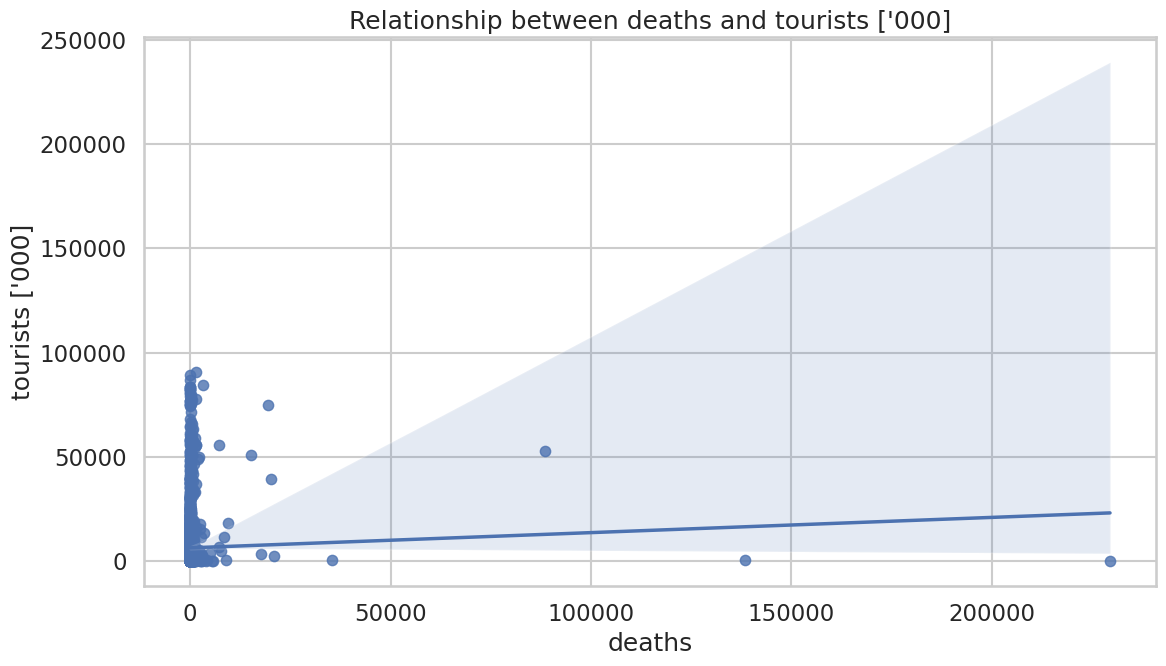

In [ ]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# X vs Y (sur TON df)
X = "deaths"
Y = "tourists ['000]"

d = df[[X, Y]].copy()
d[X] = pd.to_numeric(d[X], errors="coerce")
d[Y] = pd.to_numeric(d[Y], errors="coerce")
d = d.dropna()

# Régression simple
m = smf.ols(f'Q("{Y}") ~ Q("{X}")', data=d).fit()
print(m.summary())

# Beau graphe (1 seule courbe)
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12,7))
ax = sns.regplot(data=d, x=X, y=Y, ci=95,
                 scatter_kws={"alpha":0.8, "s":55},
                 line_kws={"linewidth":2.5})
ax.set_title(f"Relationship between {X} and {Y}")
plt.tight_layout()
plt.show()

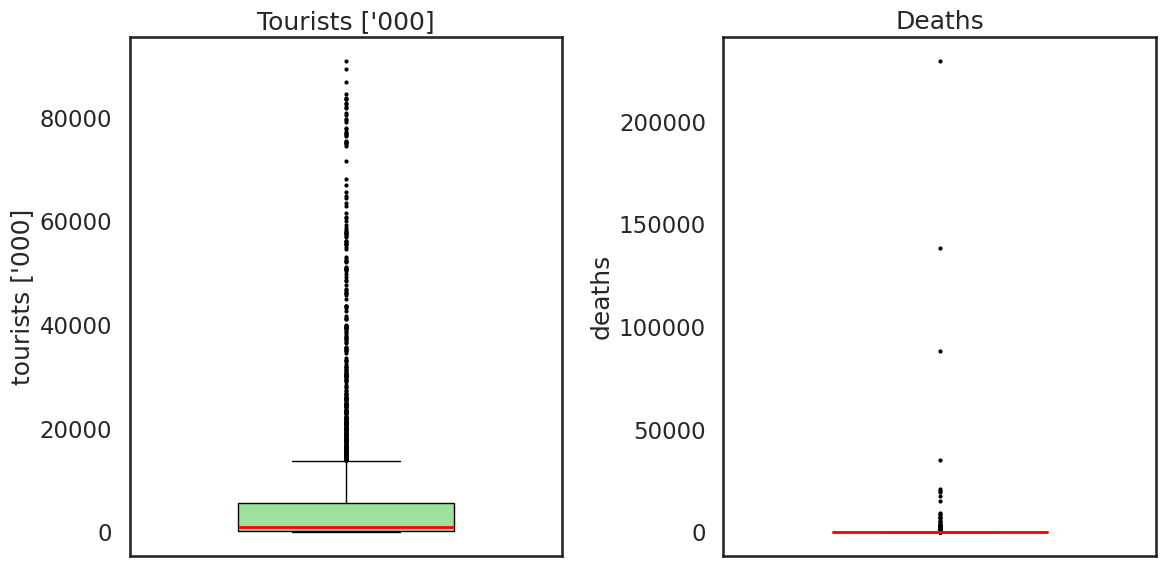

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="white", context="talk")

cols = ["tourists ['000]", "deaths"]
d = df[cols].apply(pd.to_numeric, errors="coerce")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# mêmes "props" que ton design matplotlib
common = dict(
    width=0.5,
    boxprops=dict(edgecolor="black"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(marker='o', markersize=2, markerfacecolor='black', markeredgecolor='black')
)

sns.boxplot(y=d["tourists ['000]"], ax=axes[0], color="lightgreen", **common)
axes[0].set_title("Tourists ['000]")
axes[0].grid(False)

sns.boxplot(y=d["deaths"], ax=axes[1], color="lightblue", **common)
axes[1].set_title("Deaths")
axes[1].grid(False)

plt.tight_layout()
plt.show()

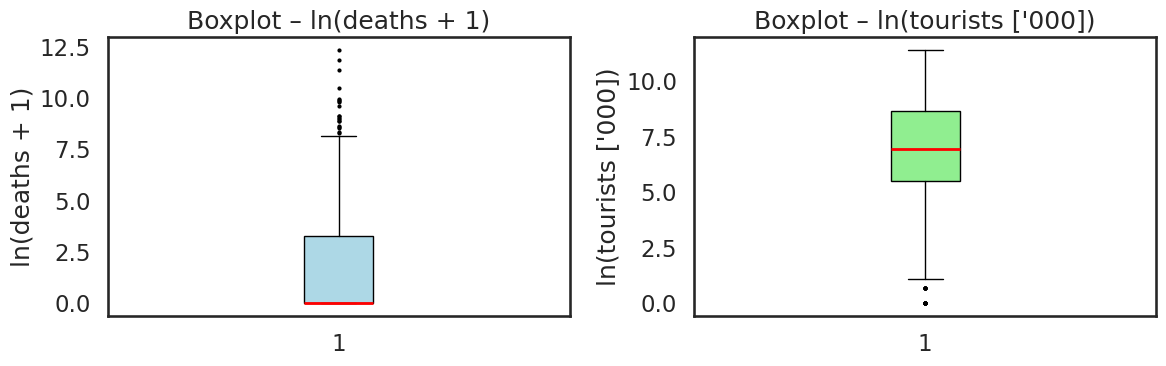

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# logs
df["ln_deaths"]   = np.log(pd.to_numeric(df["deaths"], errors="coerce") + 1)
df["ln_tourists"] = np.log(pd.to_numeric(df["tourists ['000]"], errors="coerce"))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.boxplot(df["ln_deaths"].dropna(),
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            medianprops=dict(color="red", linewidth=2),
            flierprops=dict(marker='o', markersize=2, markerfacecolor='black'))
plt.title("Boxplot – ln(deaths + 1)")
plt.ylabel("ln(deaths + 1)")
plt.grid(False)

plt.subplot(1,2,2)
plt.boxplot(df["ln_tourists"].dropna(),
            patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="black"),
            medianprops=dict(color="red", linewidth=2),
            flierprops=dict(marker='o', markersize=2, markerfacecolor='black'))
plt.title("Boxplot – ln(tourists ['000])")
plt.ylabel("ln(tourists ['000])")
plt.grid(False)

plt.tight_layout()
plt.show()

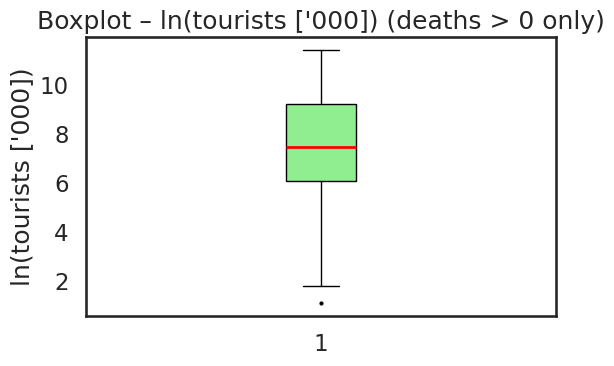

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# logs
df["ln_deaths"]   = np.log(pd.to_numeric(df["deaths"], errors="coerce") + 1)
df["ln_tourists"] = np.log(pd.to_numeric(df["tourists ['000]"], errors="coerce"))

# treated only (deaths > 0)
treated = df[pd.to_numeric(df["deaths"], errors="coerce") > 0].copy()

plt.figure(figsize=(6,4))

plt.boxplot(treated["ln_tourists"].dropna(),
            patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="black"),
            medianprops=dict(color="red", linewidth=2),
            flierprops=dict(marker='o', markersize=2, markerfacecolor='black'))

plt.title("Boxplot – ln(tourists ['000]) (deaths > 0 only)")
plt.ylabel("ln(tourists ['000])")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# --- détecte automatiquement pays / année ---
def pick_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

country_col = pick_col(["Country", "country", "COUNTRY", "iso3", "ISO3", "ISO", "Entity", "Name"])
year_col    = pick_col(["Year", "year", "YEAR"])
month_col   = pick_col(["Month", "month", "MONTH"])

meta_cols = [c for c in [country_col, year_col, month_col] if c is not None]

# --- logs (comme avant) ---
df["ln_deaths"]   = np.log(pd.to_numeric(df["deaths"], errors="coerce") + 1)
df["ln_tourists"] = np.log(pd.to_numeric(df["tourists ['000]"], errors="coerce"))

# --- groupe deaths > 0 ---
g = df[pd.to_numeric(df["deaths"], errors="coerce") > 0].copy()

def outlier_rows(data, col_ln):
    s = pd.to_numeric(data[col_ln], errors="coerce")
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lo) | (s > hi)
    cols_show = meta_cols + ["deaths", "tourists ['000]", "ln_deaths", "ln_tourists"]
    return lo, hi, data.loc[mask, cols_show].sort_values(col_ln)

# --- outliers ln_tourists ---
lo_t, hi_t, out_t = outlier_rows(g, "ln_tourists")
print("ln_tourists bounds:", lo_t, "to", hi_t)
display(out_t)

# --- outliers ln_deaths ---
lo_d, hi_d, out_d = outlier_rows(g, "ln_deaths")
print("ln_deaths bounds:", lo_d, "to", hi_d)
display(out_d)

ln_tourists bounds: 1.3124807989508742 to 13.987271654414444


,country,year,deaths,tourists ['000],ln_deaths,ln_tourists
419,Central African Republic,2002,7,3,2.079442,1.098612


ln_deaths bounds: -2.1340263506244885 to 9.10188802885371


,country,year,deaths,tourists ['000],ln_deaths,ln_tourists
1534,Nepal,2015,9034,539,9.108861,6.289716
838,Germany,2003,9370,18399,9.145375,9.820052
2035,Spain,2003,15095,50854,9.622185,10.836714
1010,India,2004,17737,3457,9.783465,8.148156
800,France,2003,19511,75048,9.878785,11.225883
1047,Italy,2003,20092,39604,9.908127,10.586685
1007,India,2001,21045,2537,9.954466,7.838738
2055,Sri Lanka,2004,35493,566,10.477119,6.338594
482,China,2008,88450,53049,11.390204,10.878971
1489,Myanmar,2008,138366,731,11.837665,6.594413


                            OLS Regression Results                            
Dep. Variable:            ln_tourists   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     9.642
Date:                Mon, 15 Dec 2025   Prob (F-statistic):            0.00236
Time:                        16:56:15   Log-Likelihood:                -5103.1
No. Observations:                2375   AIC:                         1.021e+04
Df Residuals:                    2373   BIC:                         1.022e+04
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6539      0.209     31.816      0.0

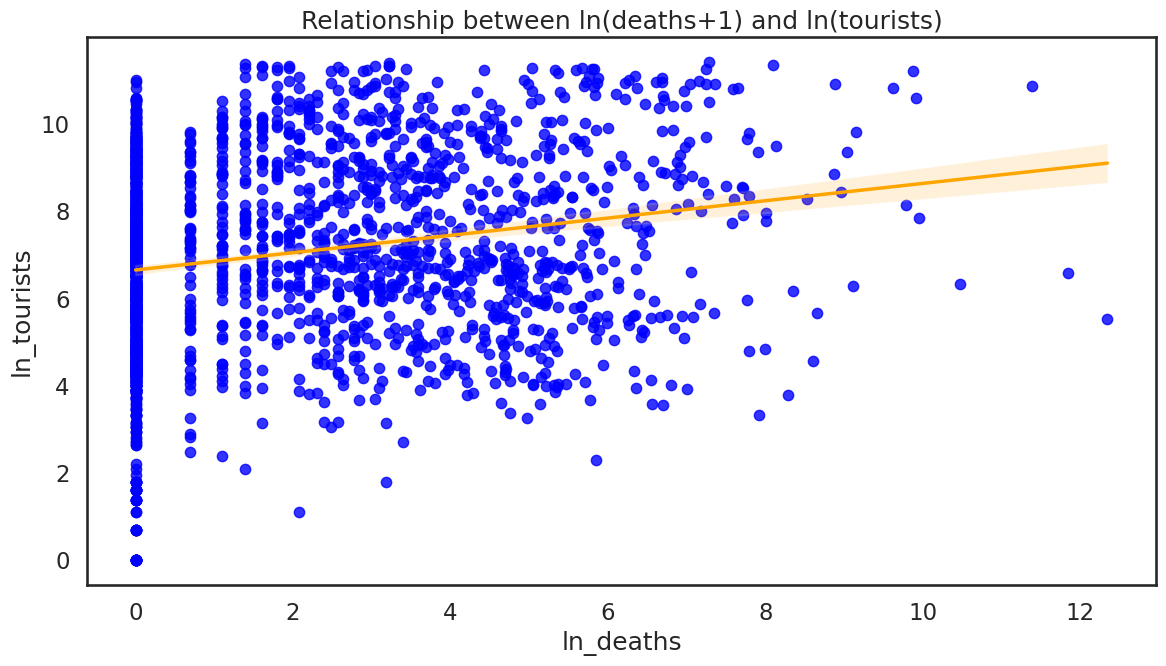

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# logs
df["ln_deaths"]   = np.log(pd.to_numeric(df["deaths"], errors="coerce") + 1)
df["ln_tourists"] = np.log(pd.to_numeric(df["tourists ['000]"], errors="coerce"))

# colonne pays pour cluster
def pick_col(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

cluster_col = pick_col(["Country","country","COUNTRY","ISO3","iso3","ISO","Entity","Name"])
if cluster_col is None:
    raise ValueError("Aucune colonne pays trouvée pour cluster. Mets cluster_col = '...'(nom exact).")

# dataset clean
d = df[[cluster_col, "ln_deaths", "ln_tourists"]].dropna()

# OLS + SE cluster (pays)
m = smf.ols("ln_tourists ~ ln_deaths", data=d).fit(
    cov_type="cluster",
    cov_kwds={"groups": d[cluster_col]}
)
print(m.summary())

# plot: points bleus, courbe orange, sans cadrillage
sns.set(style="white", context="talk")
plt.figure(figsize=(12,7))
ax = sns.regplot(
    data=d, x="ln_deaths", y="ln_tourists", ci=95,
    scatter_kws={"alpha":0.8, "s":55, "color":"blue"},
    line_kws={"linewidth":2.5, "color":"orange"}
)
ax.set_title("Relationship between ln(deaths+1) and ln(tourists)")
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
!pip -q install linearmodels

from linearmodels.panel import PanelOLS

# TODO: adapte si tes noms diffèrent
country_col = "country"
year_col = "year"

df = df.set_index([country_col, year_col]).sort_index()

res = PanelOLS(
    df["ln_tourists"],
    df[["ln_deaths", "ln_population"]],
    entity_effects=True,
    time_effects=True
).fit(cov_type="clustered", cluster_entity=True)

print(res.summary)

KeyError: "['ln_population'] not in index"